In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.DatabaseConnection import DatabaseConnection
from dotenv import find_dotenv
import matplotlib.colors as clr
from matplotlib.ticker import PercentFormatter


colors = ['#c79242', '#c7a842', '#42c792', '#42c7a8', '#4242c7', '#a842c7']
cmap = clr.ListedColormap(colors)

plt.style.use("bmh")

#### Connecting to database, downloading and preparing data

In [2]:
dotenv_path = find_dotenv()
connection = DatabaseConnection(dotenv_path)

In [3]:
query = """SELECT match_id, win FROM match_data"""

win_data = connection.execute_select_query(query)
win_data = pd.DataFrame(win_data)

win_count = win_data['win'].value_counts()
win_blue = win_count['BLUE']
win_red = win_count['RED']

In [4]:
win_data

,match_id,win
0,EUW1_6835690099,RED
1,EUW1_6835777630,BLUE
2,EUW1_6835830547,RED
3,EUW1_6836341241,BLUE
4,EUW1_6836711206,BLUE
...,...,...
895,EUW1_6945278030,RED
896,EUW1_6945316729,RED
897,EUW1_6945408901,RED
898,EUW1_6945415578,RED


In [5]:
query = """SELECT *
           FROM match_data"""


game_raw_data = connection.execute_select_query(query)
game_raw_data = pd.DataFrame(game_raw_data)

In [6]:
game_raw_data

,match_id,game_duration,win,first_drake,dragon_kills,first_baron,surrender
0,EUW1_6835690099,41.9167,RED,BLUE,6,RED,0
1,EUW1_6835777630,29.7167,BLUE,RED,4,BLUE,0
2,EUW1_6835830547,25.7167,RED,RED,3,RED,0
3,EUW1_6836341241,26.2167,BLUE,BLUE,2,None,0
4,EUW1_6836711206,34.1833,BLUE,BLUE,4,BLUE,0
...,...,...,...,...,...,...,...
895,EUW1_6945278030,38.9667,RED,RED,6,BLUE,0
896,EUW1_6945316729,33.4667,RED,RED,5,RED,0
897,EUW1_6945408901,15.1833,RED,RED,2,None,1
898,EUW1_6945415578,33.5833,RED,BLUE,5,RED,0


In [7]:
game_raw_data = game_raw_data[game_raw_data['game_duration'] >= 10]

In [8]:
game_raw_data

,match_id,game_duration,win,first_drake,dragon_kills,first_baron,surrender
0,EUW1_6835690099,41.9167,RED,BLUE,6,RED,0
1,EUW1_6835777630,29.7167,BLUE,RED,4,BLUE,0
2,EUW1_6835830547,25.7167,RED,RED,3,RED,0
3,EUW1_6836341241,26.2167,BLUE,BLUE,2,None,0
4,EUW1_6836711206,34.1833,BLUE,BLUE,4,BLUE,0
...,...,...,...,...,...,...,...
895,EUW1_6945278030,38.9667,RED,RED,6,BLUE,0
896,EUW1_6945316729,33.4667,RED,RED,5,RED,0
897,EUW1_6945408901,15.1833,RED,RED,2,None,1
898,EUW1_6945415578,33.5833,RED,BLUE,5,RED,0


#### First dragon and baron

In [9]:
first_drake_sum = game_raw_data["first_drake"].value_counts()
first_baron_sum = game_raw_data["first_baron"].value_counts()

In [10]:
none_drake_count = first_drake_sum.get('None', 0)
red_drake_count = first_drake_sum.get('RED')
blue_drake_count = first_drake_sum.get('BLUE')

In [11]:
none_baron_count = first_baron_sum.get('None', 0)
red_baron_count = first_baron_sum.get('RED')
blue_baron_count = first_baron_sum.get('BLUE')

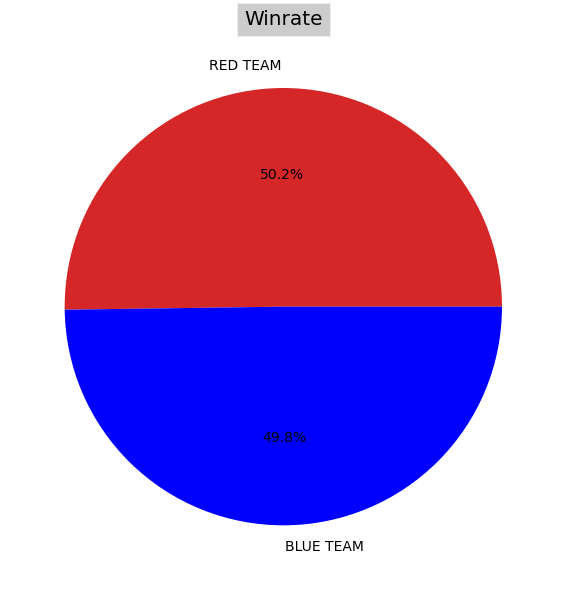

In [12]:
labels = ['RED TEAM', 'BLUE TEAM']
sizes_win_rate = [win_red, win_blue]

fig, axs = plt.subplots(figsize=(6, 6))


axs.pie(sizes_win_rate, labels=labels, autopct='%1.1f%%', colors=['#d62728', 'blue'])
axs.set_title("Winrate", bbox={'facecolor':'0.8', 'pad':5})

plt.tight_layout()
plt.show()

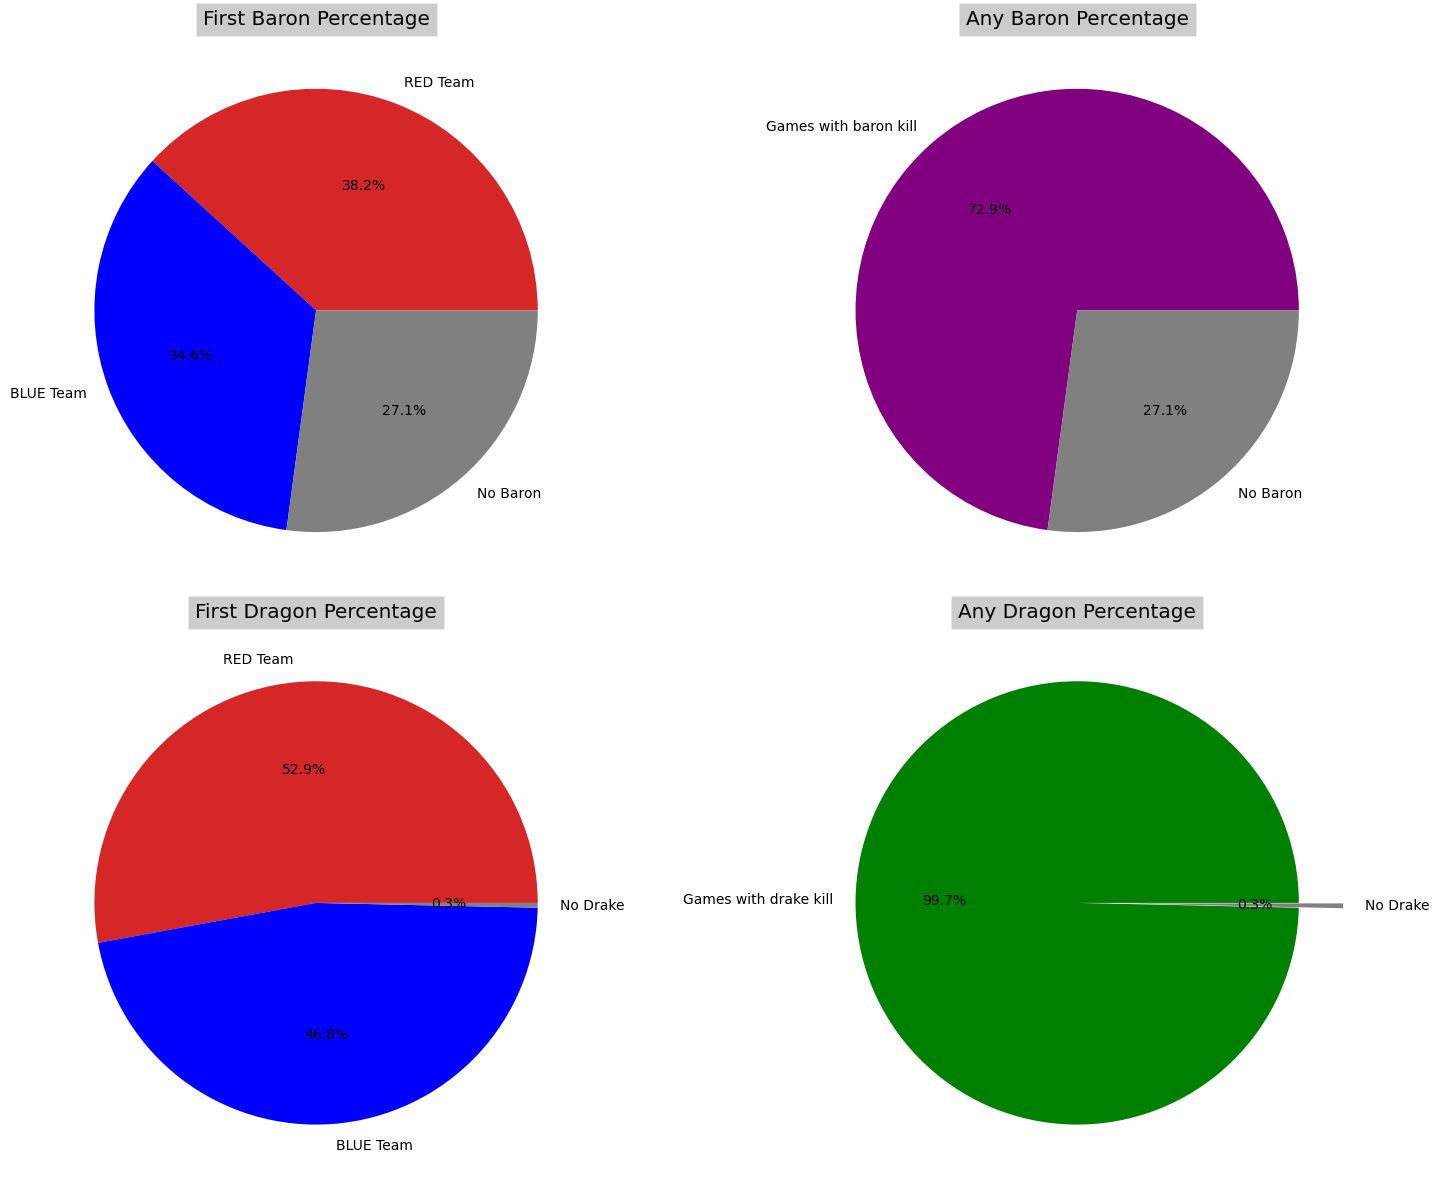

In [13]:
labels_first_baron = 'RED Team', 'BLUE Team', 'No Baron'
labels_any_baron = 'Games with baron kill', 'No Baron'
sizes_first_baron = [red_baron_count, blue_baron_count, none_baron_count]
sizes_any_baron = [red_baron_count + blue_baron_count, none_baron_count]

labels_first_dragon = 'RED Team', 'BLUE Team', 'No Drake'
labels_any_dragon = 'Games with drake kill', 'No Drake'
sizes_first_dragon = [red_drake_count, blue_drake_count, none_drake_count]
sizes_any_dragon = [red_drake_count + blue_drake_count, none_drake_count]

fig, axs = plt.subplots(2,2, figsize=(15, 12))



axs[0,0].pie(sizes_first_baron, labels=labels_first_baron, autopct='%1.1f%%', colors=['#d62728', 'blue', 'grey'])
axs[0,0].set_title("First Baron Percentage", bbox={'facecolor':'0.8', 'pad':5})

axs[0,1].pie(sizes_any_baron, labels=labels_any_baron, autopct='%1.1f%%', colors=['purple', 'grey'])
axs[0,1].set_title("Any Baron Percentage", bbox={'facecolor':'0.8', 'pad':5})

axs[1,0].pie(sizes_first_dragon, labels=labels_first_dragon, autopct='%1.1f%%', colors=['#d62728', 'blue', 'grey'])
axs[1,0].set_title("First Dragon Percentage", bbox={'facecolor':'0.8', 'pad':5})

axs[1,1].pie(sizes_any_dragon, labels=labels_any_dragon, autopct='%1.1f%%', colors=['green', 'grey'], explode=[0, 0.2])
axs[1,1].set_title("Any Dragon Percentage", bbox={'facecolor':'0.8', 'pad':5})







plt.tight_layout()
plt.show()

#### Player data correlation to winrate

In [14]:
query = """SELECT match_id, `rank`, lane FROM player_data"""

player_data = connection.execute_select_query(query)
player_data = pd.DataFrame(player_data)

mode_ranks = player_data.groupby('match_id')['rank'].agg(lambda x: x.mode()[0])
result_df = pd.DataFrame({'match_id': mode_ranks.index, 'mode_rank': mode_ranks.values})

In [15]:
player_data

,match_id,rank,lane
0,EUW1_6835690099,UNRANKED,JNG
1,EUW1_6835690099,UNRANKED,JNG
2,EUW1_6835690099,UNRANKED,SUPP
3,EUW1_6835690099,UNRANKED,TOP
4,EUW1_6835690099,UNRANKED,SUPP
...,...,...,...
8995,EUW1_6945616640,SILVER,MID
8996,EUW1_6945616640,SILVER,TOP
8997,EUW1_6945616640,SILVER,BOT
8998,EUW1_6945616640,SILVER,JNG


In [16]:
game_data_with_ranks = result_df.merge(game_raw_data)
win_data_with_ranks = result_df.merge(win_data)

In [17]:
#dropping short matches
game_data_with_ranks = game_data_with_ranks[game_data_with_ranks['game_duration'] >= 10]

In [18]:
game_data_with_ranks

,match_id,mode_rank,game_duration,win,first_drake,dragon_kills,first_baron,surrender
0,EUW1_6835690099,UNRANKED,41.9167,RED,BLUE,6,RED,0
1,EUW1_6835777630,UNRANKED,29.7167,BLUE,RED,4,BLUE,0
2,EUW1_6835830547,UNRANKED,25.7167,RED,RED,3,RED,0
3,EUW1_6836341241,UNRANKED,26.2167,BLUE,BLUE,2,None,0
4,EUW1_6836711206,UNRANKED,34.1833,BLUE,BLUE,4,BLUE,0
...,...,...,...,...,...,...,...,...
861,EUW1_6945278030,BRONZE,38.9667,RED,RED,6,BLUE,0
862,EUW1_6945316729,BRONZE,33.4667,RED,RED,5,RED,0
863,EUW1_6945408901,IRON,15.1833,RED,RED,2,None,1
864,EUW1_6945415578,IRON,33.5833,RED,BLUE,5,RED,0


In [19]:
unique_ranks = game_data_with_ranks['mode_rank'].unique()

rank_dataframes = {}
winrate_dataframes = {}
for rank in unique_ranks:
    rank_dataframes[rank] = game_data_with_ranks[game_data_with_ranks['mode_rank'] == rank]
    winrate_dataframes[rank] = win_data_with_ranks[win_data_with_ranks['mode_rank'] == rank]

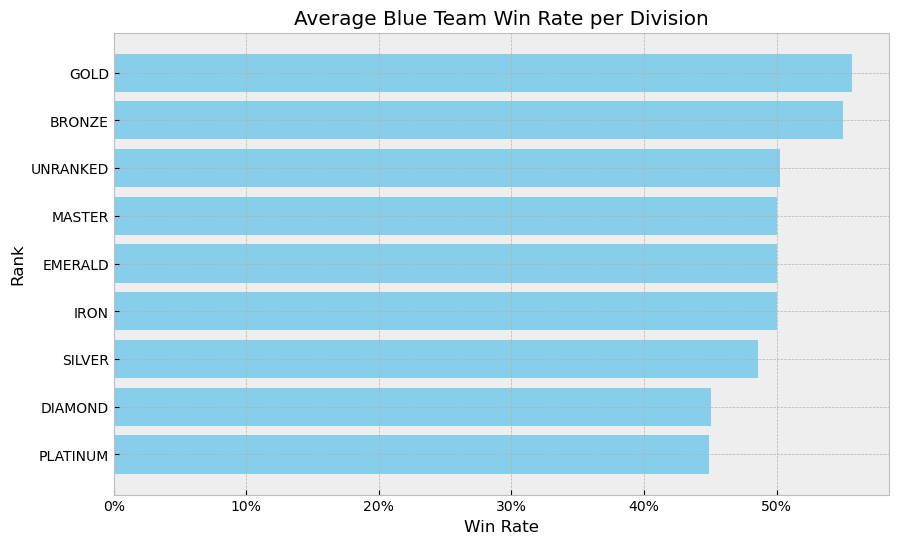

In [20]:
average_win_rate = {}

for rank, rank_df in winrate_dataframes.items():
    total_games = len(rank_df)
    wins = len(rank_df[rank_df['win'] == 'BLUE']) 
    win_rate = wins / total_games
    average_win_rate[rank] = win_rate

win_rate_df = pd.DataFrame(list(average_win_rate.items()), columns=['Rank', 'Win Rate'])
win_rate_df = win_rate_df.sort_values(by='Win Rate')

plt.figure(figsize=(10, 6))
plt.barh(win_rate_df['Rank'], win_rate_df['Win Rate'], color='skyblue')
plt.xlabel('Win Rate')
plt.ylabel('Rank')
plt.title('Average Blue Team Win Rate per Division')

plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.show()


#### Average dragon by rank in time

In [21]:
average_dragon_kills = {}
average_game_duration = {}

for rank, rank_df in rank_dataframes.items():
    mean_dragon_kills = rank_df['dragon_kills'].mean()
    mean_game_duration = rank_df['game_duration'].mean()

    average_dragon_kills[rank] = mean_dragon_kills
    average_game_duration[rank] = mean_game_duration

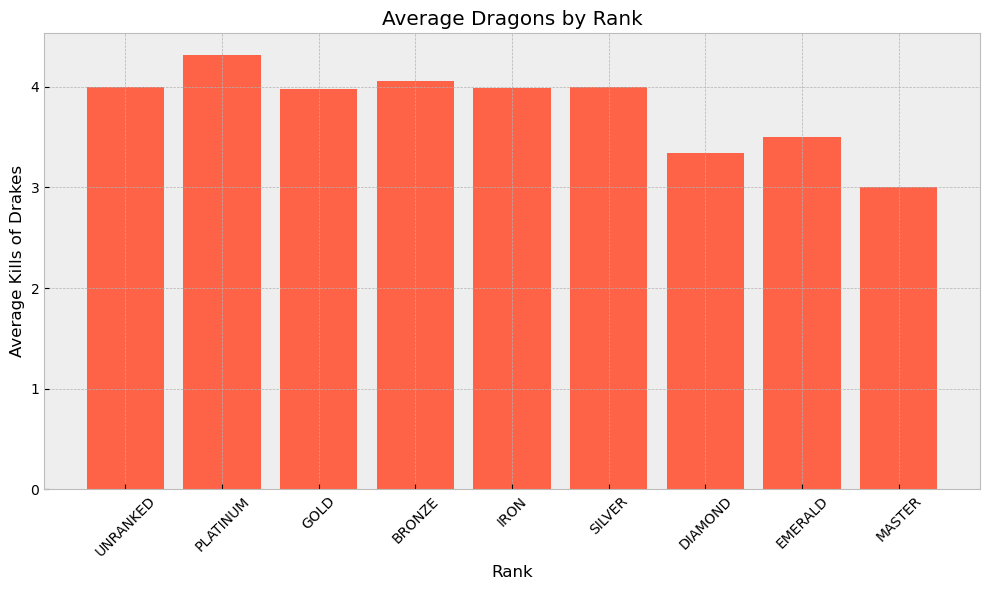

In [22]:
ranks = list(average_dragon_kills.keys())
scores = list(average_dragon_kills.values())

plt.figure(figsize=(10, 6))
plt.bar(ranks, scores, color='tomato')
plt.xlabel('Rank')
plt.ylabel('Average Kills of Drakes')
plt.title('Average Dragons by Rank')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

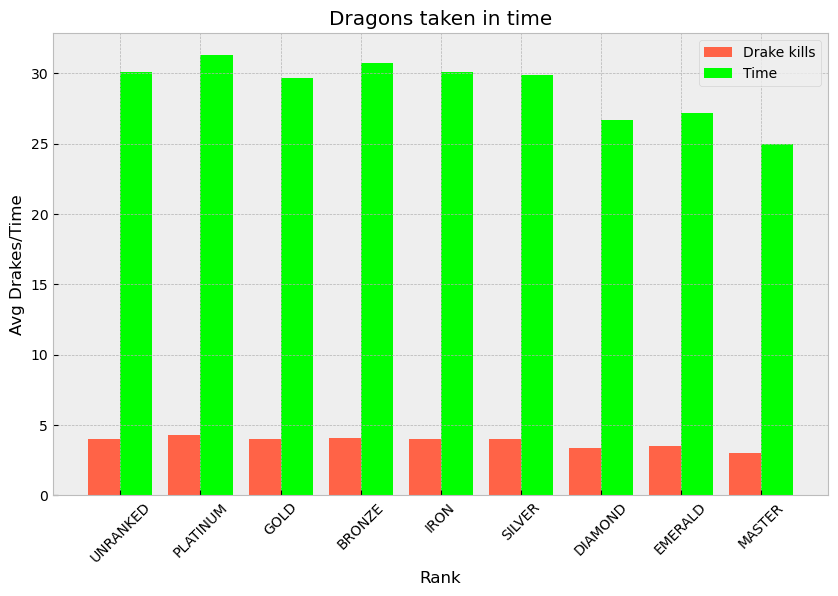

In [23]:
ranks = list(average_dragon_kills.keys())
avg_dgk = list(average_dragon_kills.values())
avg_time = list(average_game_duration.values())
X_axis = np.arange(len(ranks))

plt.figure(figsize=(10, 6))
plt.bar(X_axis - 0.2, avg_dgk, 0.4, color='tomato')
plt.bar(X_axis + 0.2, avg_time, 0.4, color='lime')
plt.xticks(X_axis, ranks)
plt.xlabel('Rank')
plt.ylabel('Avg Drakes/Time')
plt.title('Dragons taken in time')
plt.xticks(rotation=45) 
plt.legend(['Drake kills', 'Time'])
plt.show()

#### Statistic correlation to winrate

In [24]:
query = """SELECT match_id, team_id, `rank`, first_blood, lane, vision_score_per_min, dmg_per_min FROM player_data"""

player_data = connection.execute_select_query(query)
player_data = pd.DataFrame(player_data)

player_data

,match_id,team_id,rank,first_blood,lane,vision_score_per_min,dmg_per_min
0,EUW1_6835690099,100,UNRANKED,0,JNG,0.753319,1956.870
1,EUW1_6835690099,200,UNRANKED,1,JNG,0.507208,702.903
2,EUW1_6835690099,100,UNRANKED,0,SUPP,2.859450,445.768
3,EUW1_6835690099,200,UNRANKED,0,TOP,1.021830,1547.190
4,EUW1_6835690099,200,UNRANKED,0,SUPP,1.986760,624.430
...,...,...,...,...,...,...,...
8995,EUW1_6945616640,100,SILVER,0,MID,0.452939,543.915
8996,EUW1_6945616640,100,SILVER,0,TOP,0.278843,425.287
8997,EUW1_6945616640,100,SILVER,0,BOT,0.518375,491.616
8998,EUW1_6945616640,200,SILVER,0,JNG,0.697508,485.014


In [25]:
unique_ranks = player_data['rank'].unique()

rank_dataframes = {}

for rank in unique_ranks:
    #rank_dataframes[rank] = player_data[player_data['rank'] == rank]
    rank_dataframes[rank] = player_data[(player_data['rank'] == rank) & (player_data['team_id'] != '200')]


In [26]:
rank_dataframes

{'UNRANKED':              match_id team_id      rank  first_blood  lane  \
 0     EUW1_6835690099     100  UNRANKED            0   JNG   
 2     EUW1_6835690099     100  UNRANKED            0  SUPP   
 5     EUW1_6835690099     100  UNRANKED            0   MID   
 7     EUW1_6835690099     100  UNRANKED            0   BOT   
 15    EUW1_6835777630     100  UNRANKED            0   JNG   
 ...               ...     ...       ...          ...   ...   
 8880  EUW1_6944681649     100  UNRANKED            0   JNG   
 8881  EUW1_6944681649     100  UNRANKED            0  SUPP   
 8904  EUW1_6945007703     100  UNRANKED            0   JNG   
 8950  EUW1_6945278030     100  UNRANKED            0  SUPP   
 8978  EUW1_6945408901     100  UNRANKED            0   BOT   
 
       vision_score_per_min  dmg_per_min  
 0                 0.753319     1956.870  
 2                 2.859450      445.768  
 5                 0.545063      971.056  
 7                 0.779556      790.363  
 15            

In [27]:
average_vision_score = {}
average_dmg_done = {}

for rank, rank_df in rank_dataframes.items():
    mean_vision_score = rank_df['vision_score_per_min'].mean()
    mean_dmg_done = rank_df['dmg_per_min'].mean()

    average_vision_score[rank] = mean_vision_score
    average_dmg_done[rank] = mean_dmg_done

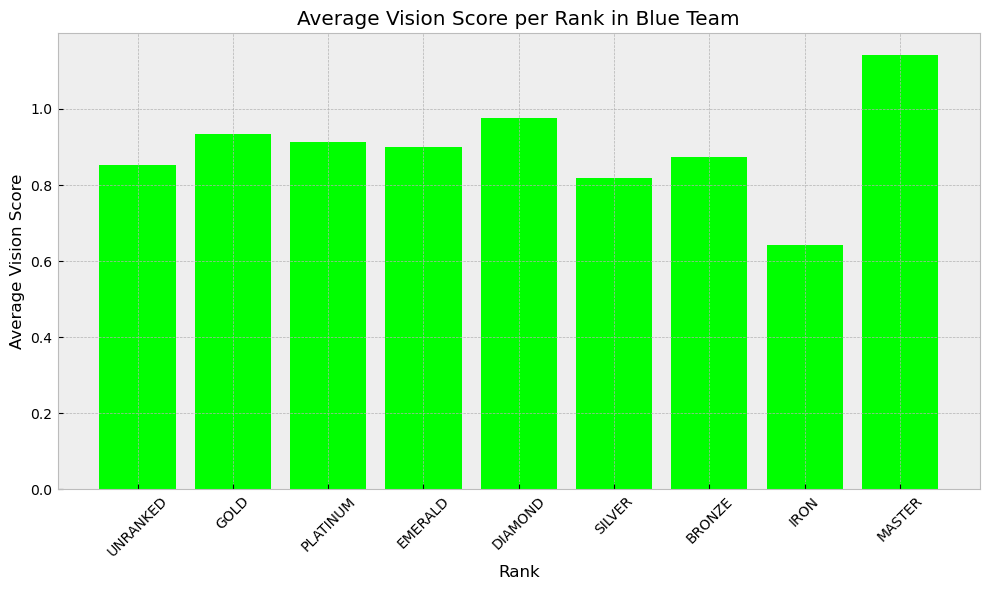

In [28]:
ranks = list(average_vision_score.keys())
scores = list(average_vision_score.values())

plt.figure(figsize=(10, 6))
plt.bar(ranks, scores, color='lime')
plt.xlabel('Rank')
plt.ylabel('Average Vision Score')
plt.title('Average Vision Score per Rank in Blue Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

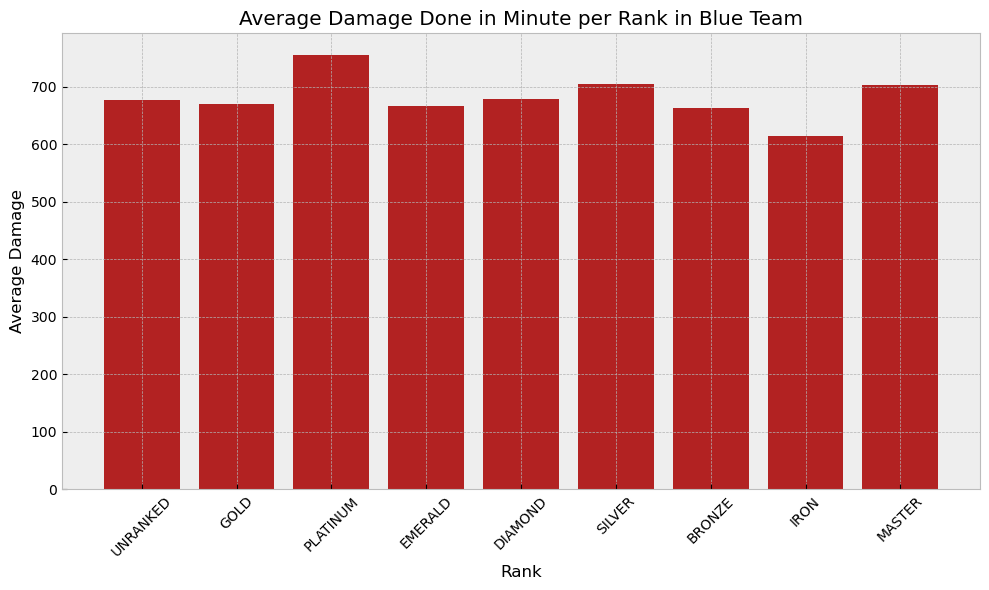

In [29]:
ranks = list(average_dmg_done.keys())
scores = list(average_dmg_done.values())

plt.figure(figsize=(10, 6))
plt.bar(ranks, scores, color='firebrick')
plt.xlabel('Rank')
plt.ylabel('Average Damage')
plt.title('Average Damage Done in Minute per Rank in Blue Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### First blood correlation to winrate

In [30]:
#dropping no first bloods
first_blood_data = player_data[player_data['first_blood'] == 1]

In [31]:
first_blood_data

,match_id,team_id,rank,first_blood,lane,vision_score_per_min,dmg_per_min
1,EUW1_6835690099,200,UNRANKED,1,JNG,0.507208,702.903
18,EUW1_6835777630,200,PLATINUM,1,MID,0.670173,1042.930
25,EUW1_6835830547,200,PLATINUM,1,TOP,0.372020,925.993
39,EUW1_6836341241,100,EMERALD,1,JNG,0.620029,769.741
46,EUW1_6836711206,100,UNRANKED,1,BOT,0.883980,536.836
...,...,...,...,...,...,...,...
8951,EUW1_6945278030,100,BRONZE,1,BOT,0.685972,799.139
8968,EUW1_6945316729,100,BRONZE,1,SUPP,1.649320,540.978
8977,EUW1_6945408901,200,BRONZE,1,MID,0.359895,574.759
8987,EUW1_6945415578,100,IRON,1,MID,0.338201,1122.740


In [32]:
first_blood_count = first_blood_data['team_id'].value_counts()

In [33]:
#blue = 100, red = 200
first_blood_blue = first_blood_count['100']
first_blood_red = first_blood_count['200']
win_blue = win_count['BLUE']
win_red = win_count['RED']

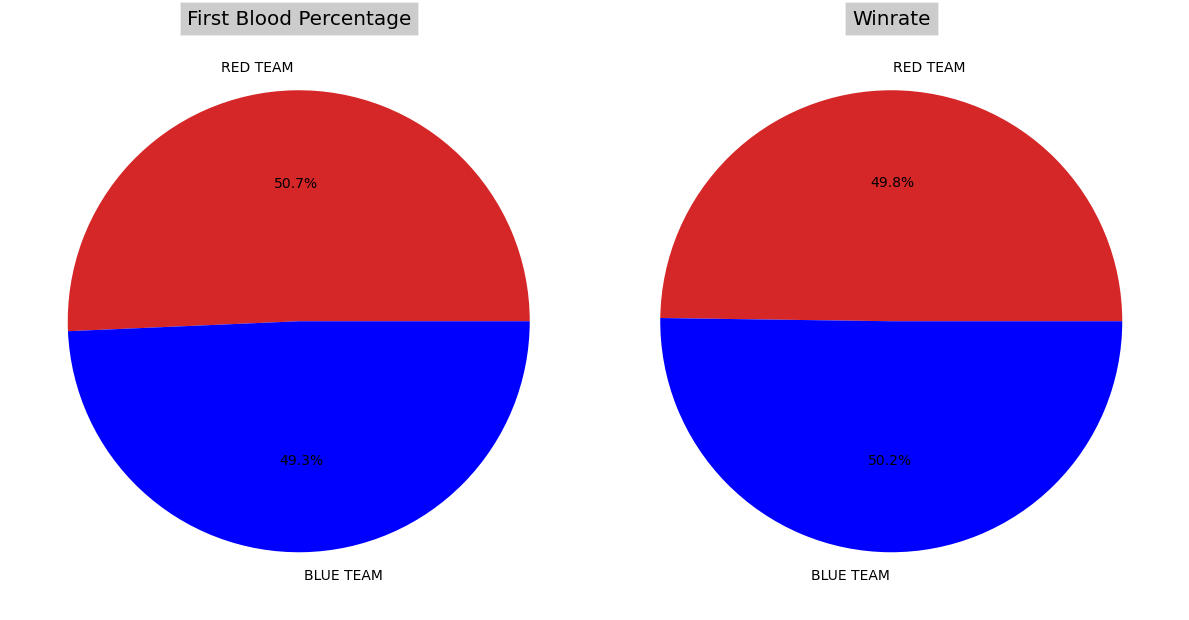

In [34]:
labels = ['RED TEAM', 'BLUE TEAM']
sizes_first_blood = [first_blood_red, first_blood_blue]
sizes_win_rate = [win_blue, win_red]
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].pie(sizes_first_blood, labels=labels, autopct='%1.1f%%', colors=['#d62728', 'blue'])
axs[0].set_title("First Blood Percentage", bbox={'facecolor':'0.8', 'pad':5})

axs[1].pie(sizes_win_rate, labels=labels, autopct='%1.1f%%', colors=['#d62728', 'blue'])
axs[1].set_title("Winrate", bbox={'facecolor':'0.8', 'pad':5})


plt.tight_layout()
plt.show()